[1 0 0 0]


Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 0 seconds.
The number of effective samples is smaller than 25% for some parameters.
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/traceplot.py:152: UserWarning: A valid var_name should be provided, found {'t'} expected from {'theta'}
  invalid_var_names, all_var_names


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc62bbf9490>,
      dtype=object)

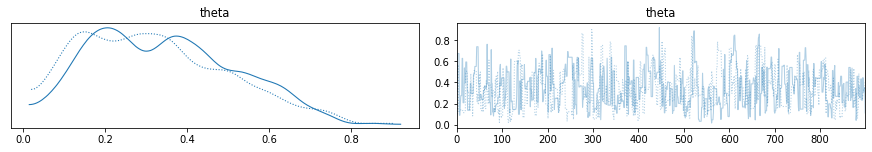

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pymc3 as pm

np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real,size=n_experiments)
print(data)

with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)

    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(1000, step=step, start=start)

burnin =100
chain = trace[burnin:]
pm.traceplot(chain, lines={'theta': theta_real})
